In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import ct_sm
from cosmoTransitions import pathDeformation
from cosmoTransitions import transitionFinder
%matplotlib inline
from collections import namedtuple
from collections import OrderedDict
import sys


def calcStrength(critobj):
    if critobj['trantype']==1:
        return np.linalg.norm(critobj['low_vev'])/critobj['Tcrit']
    else:
        return 0


##Phase Transition with all modes resummed

In [2]:
model = ct_sm.sm_eft()

Guesses for mu12 and l1 =  -7849.96 0.11
RG running with initial parameters at the input scale...
Finding the correct parameters at the input scale...
Iteration converged with [mu12, lam1] =  [-8651.6786477617497, 0.14903947069623535]
v, mh =  [ 246.22001648] 125.000531249
Final values of mu12, l1 =  -8943.57161006 0.125846591177
Scale set at mu =  246.22
vev =  [ 246.22001648]
mh =  125.000132812


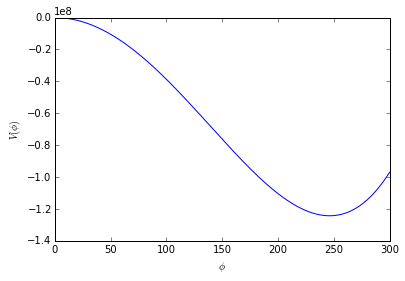

In [34]:
model.plot1d(0,300,T=0)

In [35]:
scipy.optimize.minimize(lambda x: model.Vtot(x,T=0),[200],method='Nelder-Mead')

 final_simplex: (array([[ 246.22001648],
       [ 246.21994019]]), array([ -1.26031720e+08,  -1.26031720e+08]))
           fun: -126031719.92768452
       message: 'Optimization terminated successfully.'
          nfev: 42
           nit: 21
        status: 0
       success: True
             x: array([ 246.22001648])

In [36]:
np.sqrt(model.d2V(model.findMinimum(),T=0))

array([[ 124.9995]])

In [3]:
model.getPhases()

Tracing phase starting at x = [ 246.21998952] ; t = 0.0
Tracing minimum up
traceMinimum t0 = 0
..............................................................................................................................................................................................
Tracing phase starting at x = [ -2.60208521e-18] ; t = 159.701059266
Tracing minimum down
traceMinimum t0 = 159.701
......................................................
Tracing minimum up
traceMinimum t0 = 159.701
..............


{0: Phase(key=0, X=[[246.2], ..., [22.25]], T=[0, ..., 158.7], dXdT=[[-2.008e-19], ..., [-334.4]],
 1: Phase(key=1, X=[[-0.002716], ..., [-2.429e-17]], T=[158.5, ..., 1000], dXdT=[[0.3488], ..., [-0.0004623]]}

Tracing phase starting at x = [ 246.21998952] ; t = 0.0
Tracing minimum up
traceMinimum t0 = 0
..............................................................................................................................................................................................
Tracing phase starting at x = [ -2.60208521e-18] ; t = 159.701059266
Tracing minimum down
traceMinimum t0 = 159.701
......................................................
Tracing minimum up
traceMinimum t0 = 159.701
..............


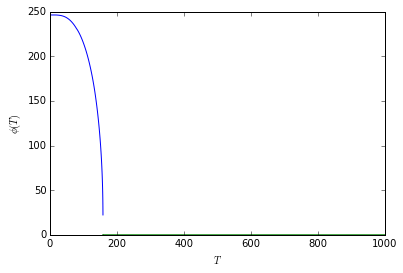

In [37]:
model.plotPhasesPhi()

In [38]:
model.phases

{0: Phase(key=0, X=[[246.2], ..., [22.25]], T=[0, ..., 158.7], dXdT=[[-2.008e-19], ..., [-334.4]],
 1: Phase(key=1, X=[[-0.002716], ..., [-2.429e-17]], T=[158.5, ..., 1000], dXdT=[[0.3488], ..., [-0.0004623]]}

In [39]:
transObj=model.calcTcTrans()
Tc = transObj[0]['Tcrit']
transObj

[{'Delta_rho': 5163540.9670753479,
  'Tcrit': 158.6477934945085,
  'high_phase': 1,
  'high_vev': array([-0.09601282]),
  'low_phase': 0,
  'low_vev': array([ 26.90431683]),
  'trantype': 1}]

In [40]:
calcStrength(transObj[0])

0.16958519398257227

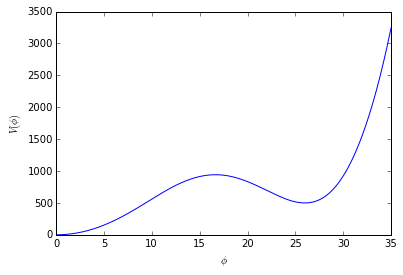

In [41]:
model.plot1d(0,35,T=Tc*1.0001)

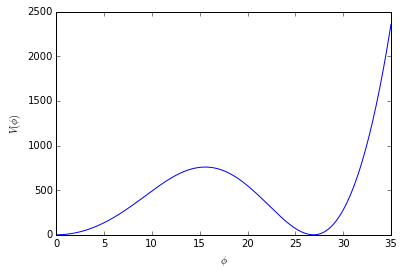

In [11]:
model.plot1d(0,35,T=Tc)

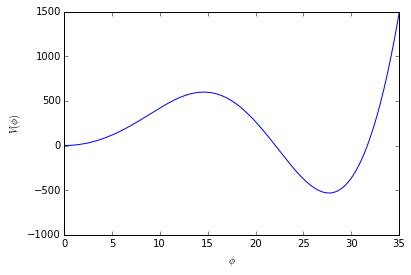

In [12]:
model.plot1d(0,35,T=Tc*0.9999)

##Phase Transition with only 0 modes resummed

In [2]:
model = ct_sm.sm_eft()
model.daisyResum = 2

Guesses for mu12 and l1 =  -7849.96 0.11
RG running with initial parameters at the input scale...
Finding the correct parameters at the input scale...
Iteration converged with [mu12, lam1] =  [-8651.6786477617497, 0.14903947069623535]
v, mh =  [ 246.22001648] 125.000531249
Final values of mu12, l1 =  -8943.57161006 0.125846591177
Scale set at mu =  246.22
vev =  [ 246.22001648]
mh =  125.000132812


In [18]:
model.getPhases(tracingArgs={"single_trace_args": {"minratio": 1e-5}})

Tracing phase starting at x = [ 246.21998952] ; t = 0.0
Tracing minimum up
traceMinimum t0 = 0
.................................................................
Tracing phase starting at x = [ 237.27863578] ; t = 74.3045510894
Tracing minimum down
traceMinimum t0 = 74.3046
......................
Tracing minimum up
traceMinimum t0 = 74.3046
..................................................................................................................................................................................................................................................................................................................................
Tracing phase starting at x = [ -7.31393600e-05] ; t = 174.792975139
Tracing minimum down
traceMinimum t0 = 174.793
.......................
Tracing minimum up
traceMinimum t0 = 174.793
...........


{0: Phase(key=0, X=[[246.2], ..., [237.4]], T=[0, ..., 73.3], dXdT=[[-2.008e-19], ..., [-0.6164]],
 1: Phase(key=1, X=[[237.6], ..., [20.82]], T=[73.29, ..., 173.8], dXdT=[[0.08461], ..., [-375.2]],
 2: Phase(key=2, X=[[0.01521], ..., [-0.0008865]], T=[173.8, ..., 1000], dXdT=[[-1.221], ..., [-0.00039]]}

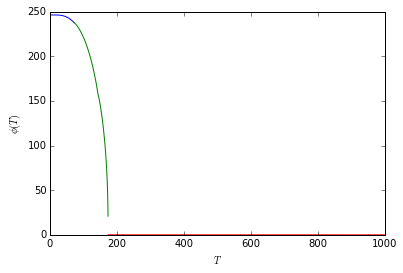

In [17]:
model.plotPhasesPhi()

In [5]:
model.phases

{0: Phase(key=0, X=[[246.2], ..., [237.4]], T=[0, ..., 73.3], dXdT=[[-2.008e-19], ..., [-0.6164]],
 1: Phase(key=1, X=[[237.6], ..., [20.82]], T=[73.29, ..., 173.8], dXdT=[[0.08461], ..., [-375.2]],
 2: Phase(key=2, X=[[0.01521], ..., [-0.0008865]], T=[173.8, ..., 1000], dXdT=[[-1.221], ..., [-0.00039]]}

CT finds no phase overlap, so no first order transition!

In [9]:
model.phases[2].T[0]

173.82880711588754

In [8]:
model.phases[1].T[-1]

173.79286771444433

In [19]:
transObj=model.calcTcTrans()
Tc = transObj[0]['Tcrit']
transObj

[{'Delta_rho': 0.0,
  'Tcrit': 173.81083741516593,
  'action': 0.0,
  'high_phase': 2,
  'high_vev': array([ 0.015213]),
  'instanton': None,
  'low_phase': 1,
  'low_vev': array([ 0.015213]),
  'trantype': 2},
 {'Delta_rho': -15975.60805362463,
  'Tcrit': 73.29920075925685,
  'high_phase': 1,
  'high_vev': array([ 237.57379661]),
  'low_phase': 0,
  'low_vev': array([ 237.42620623]),
  'trantype': 1}]

In [11]:
calcStrength(transObj[0])

0

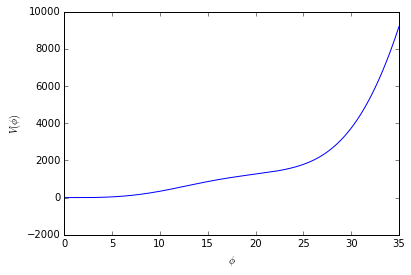

In [12]:
model.plot1d(0,35,T=Tc*1.0001)

Minima are very shallow!

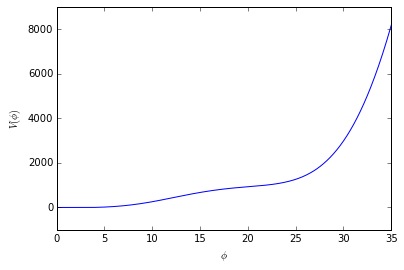

In [14]:
model.plot1d(0,35,T=Tc)

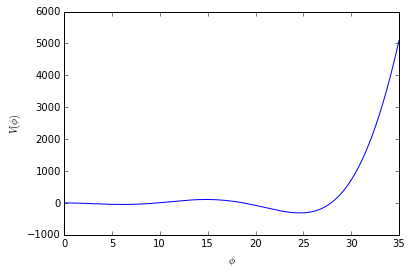

In [15]:
model.plot1d(0,35,T=Tc*0.9997)

##No Daisy Resummation

In [16]:
model = ct_sm.sm_eft()
model.daisyResum = 0

Guesses for mu12 and l1 =  -7849.96 0.11
RG running with initial parameters at the input scale...
Finding the correct parameters at the input scale...
Iteration converged with [mu12, lam1] =  [-8651.6786477617497, 0.14903947069623535]
v, mh =  [ 246.22001648] 125.000531249
Final values of mu12, l1 =  -8943.57161006 0.125846591177
Scale set at mu =  246.22
vev =  [ 246.22001648]
mh =  125.000132812


In [18]:
model.getPhases(tracingArgs={"single_trace_args": {"minratio": 1e-8}})

Tracing phase starting at x = [ 246.21998952] ; t = 0.0
Tracing minimum up
traceMinimum t0 = 0
.....................................................................................................................................................................
Tracing phase starting at x = [ 152.92620209] ; t = 132.877609507
Tracing minimum down
traceMinimum t0 = 132.878
......................
Tracing minimum up
traceMinimum t0 = 132.878
...........................................................................................................................................................................................................................................................................
Tracing phase starting at x = [ -4.75000000e-05] ; t = 157.211442103
Tracing minimum down
traceMinimum t0 = 157.211
................................
Tracing minimum up
traceMinimum t0 = 157.211
..........


{0: Phase(key=0, X=[[246.2], ..., [156.4]], T=[0, ..., 131.9], dXdT=[[-2.008e-19], ..., [-6.153]],
 1: Phase(key=1, X=[[155.4], ..., [20.6]], T=[131.9, ..., 156.2], dXdT=[[-1.582], ..., [-396.4]],
 2: Phase(key=2, X=[[-0.007616], ..., [1.388e-17]], T=[156.1, ..., 1000], dXdT=[[1.47], ..., [-0.0004065]]}

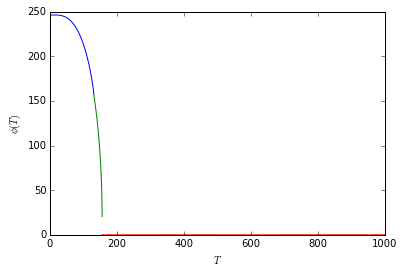

In [19]:
model.plotPhasesPhi()

In [20]:
model.phases

{0: Phase(key=0, X=[[246.2], ..., [156.4]], T=[0, ..., 131.9], dXdT=[[-2.008e-19], ..., [-6.153]],
 1: Phase(key=1, X=[[155.4], ..., [20.6]], T=[131.9, ..., 156.2], dXdT=[[-1.582], ..., [-396.4]],
 2: Phase(key=2, X=[[-0.007616], ..., [1.388e-17]], T=[156.1, ..., 1000], dXdT=[[1.47], ..., [-0.0004065]]}

In [21]:
transObj=model.calcTcTrans()
Tc = transObj[0]['Tcrit']
transObj

[{'Delta_rho': 3776348.6134166718,
  'Tcrit': 156.16439975661154,
  'high_phase': 2,
  'high_vev': array([-0.00488008]),
  'low_phase': 1,
  'low_vev': array([ 25.02386998]),
  'trantype': 1},
 {'Delta_rho': 1576781.5876426697,
  'Tcrit': 131.87525869582774,
  'high_phase': 1,
  'high_vev': array([ 155.38680362]),
  'low_phase': 0,
  'low_vev': array([ 156.42048939]),
  'trantype': 1}]

In [22]:
calcStrength(transObj[0])

0.16024055430831871

##Daisy Resummation Comparison

In [23]:
model = ct_sm.sm_eft()

Guesses for mu12 and l1 =  -7849.96 0.11
RG running with initial parameters at the input scale...
Finding the correct parameters at the input scale...
Iteration converged with [mu12, lam1] =  [-8651.6786477617497, 0.14903947069623535]
v, mh =  [ 246.22001648] 125.000531249
Final values of mu12, l1 =  -8943.57161006 0.125846591177
Scale set at mu =  246.22
vev =  [ 246.22001648]
mh =  125.000132812


In [25]:
v1 = 0
v2 = 300
Tc = 158.6883899871672


v = np.linspace(v1,v2,100)[:,np.newaxis]
model.daisyResum = 0
VT50_d0 = model.DVtot(v,50.)
VTTc_d0 = model.DVtot(v,Tc)
VT200_d0 = model.DVtot(v,200.)

model.daisyResum = 1
VT50_d1 = model.DVtot(v,50.)
VTTc_d1 = model.DVtot(v,Tc)
VT200_d1 = model.DVtot(v,200.)

model.daisyResum = 2
VT50_d2 = model.DVtot(v,50.)
VTTc_d2 = model.DVtot(v,Tc)
VT200_d2 = model.DVtot(v,200.)

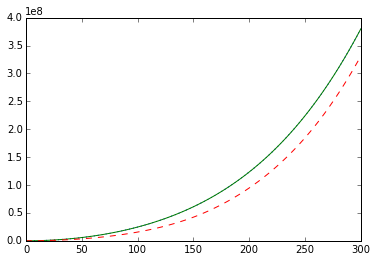

In [26]:
plt.plot(v,VT200_d1,':',v,VT200_d1,v,VT200_d2,'--')

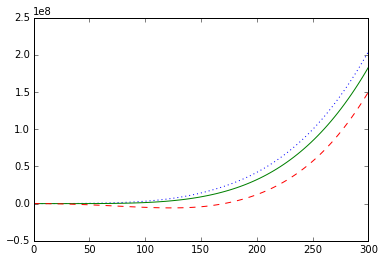

In [27]:
plt.plot(v,VTTc_d0,':',v,VTTc_d1,v,VTTc_d2,'--')